In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df = pd.read_csv('Churn_Modelling.csv')

In [201]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [202]:
df.shape

(10000, 14)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [204]:
df.duplicated().sum()

np.int64(0)

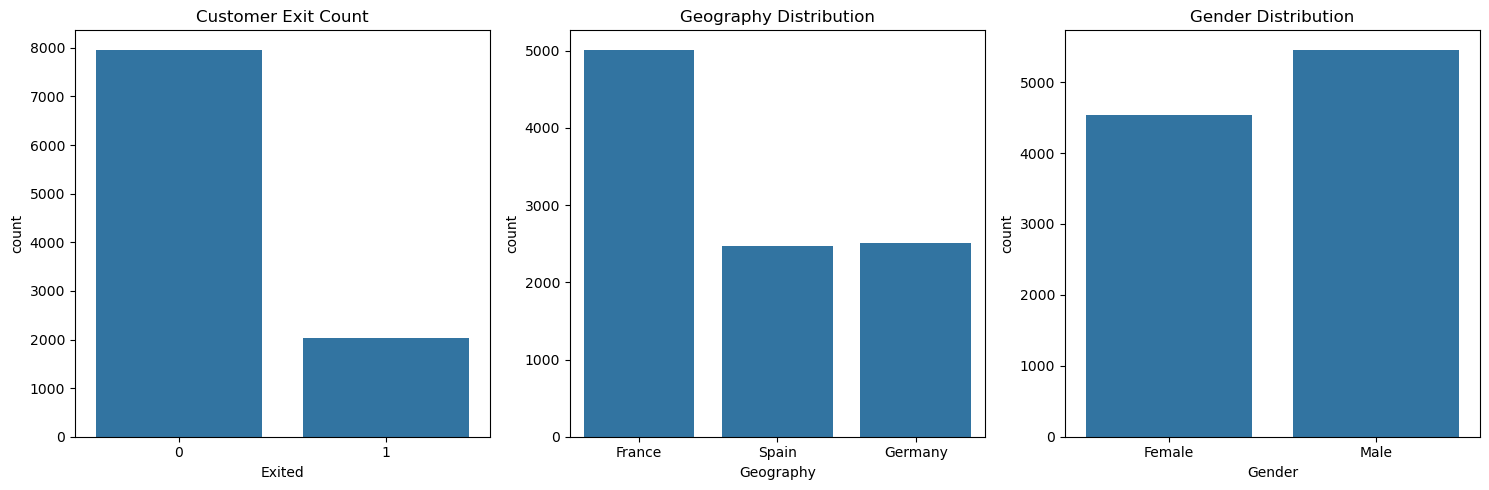

In [205]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Exited
sns.countplot(data=df, x='Exited', ax=axes[0])
axes[0].set_title('Customer Exit Count')

# Plot 2: Geography
sns.countplot(data=df, x='Geography', ax=axes[1])
axes[1].set_title('Geography Distribution')

# Plot 3: Gender
sns.countplot(data=df, x='Gender', ax=axes[2])
axes[2].set_title('Gender Distribution')

# Adjust spacing
plt.tight_layout()
plt.show()

In [206]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [207]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [208]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [209]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
3169,677,40,5,0.00,2,1,0,88947.56,0,0,1,1
5702,585,36,7,0.00,2,1,0,94283.09,0,0,0,1
1880,589,36,9,140355.56,2,1,0,136329.96,0,1,0,0
6316,725,37,6,124348.38,2,0,1,176984.34,0,0,0,1
7802,773,63,9,111179.83,1,1,1,93091.02,0,0,1,1


In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X = df.loc[:,df.columns[df.columns!='Exited']]
y = df.loc[:,'Exited']

In [212]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [213]:
X_train.shape,X_test.shape

((8000, 11), (2000, 11))

In [214]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [215]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [216]:
model = Sequential()

# input_layer + first hidden layer
model.add(Dense(3,activation='sigmoid',input_dim=11))

#hidden layer
model.add(Dense(3,activation='sigmoid'))

# output layer
model.add(Dense(1,activation='sigmoid'))

C:\Users\thala\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [217]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

In [218]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [219]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7934 - loss: 0.5115 - val_accuracy: 0.7987 - val_loss: 0.5018
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7934 - loss: 0.5069 - val_accuracy: 0.7987 - val_loss: 0.4967
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7934 - loss: 0.5021 - val_accuracy: 0.7987 - val_loss: 0.4909
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7934 - loss: 0.4963 - val_accuracy: 0.7987 - val_loss: 0.4840
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7934 - loss: 0.4891 - val_accuracy: 0.7987 - val_loss: 0.4760
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7934 - loss: 0.4808 - val_accuracy: 0.7987 - val_loss: 0.4668
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7934 - loss: 0.4722 - val_accuracy: 0.7987 - val_loss: 0.4589
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7934 - loss: 0.4642 - val_accuracy:

In [220]:
model.layers[0].get_weights()

[array([[-1.0976599e-02,  4.4994075e-02,  1.2989762e-01],
        [-4.1236898e-01, -2.8589330e+00, -1.6562335e+00],
        [-1.7454503e-02,  6.2379610e-02,  3.1071814e-02],
        [-9.1638184e-01, -4.1491589e-01, -5.6285727e-01],
        [-2.7908340e+00, -8.5292578e-01, -7.3320377e-01],
        [ 4.0764719e-02,  1.2403014e-01, -9.2630357e-02],
        [-7.6742566e-01, -1.4919530e-03,  4.2611548e-01],
        [ 1.7513901e-02,  8.9419521e-02, -9.8947786e-02],
        [ 7.6054996e-01,  8.9376099e-02, -6.2754029e-01],
        [ 2.8717218e-02, -6.0605197e-03, -9.9813670e-02],
        [-3.8820317e-03,  2.3667580e-01,  6.9341654e-01]], dtype=float32),
 array([-1.6883279 ,  0.47689393,  0.16455247], dtype=float32)]

In [221]:
model.layers[1].get_weights()

[array([[-1.728074 , -2.6237247, -2.5222116],
        [ 1.2567238,  1.9776312,  1.7365081],
        [ 1.6601788,  1.7374632,  0.9715909]], dtype=float32),
 array([-0.9533628 , -0.8876305 , -0.52408767], dtype=float32)]

In [222]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [223]:
y_log

array([[0.06715036],
       [0.07988153],
       [0.26135218],
       ...,
       [0.55343354],
       [0.16393374],
       [0.2345172 ]], dtype=float32)

In [224]:
y_pred = np.where(y_log>=0.5,1,0)

In [225]:
from sklearn.metrics import accuracy_score

In [226]:
accuracy_score(y_test,y_pred)

0.833

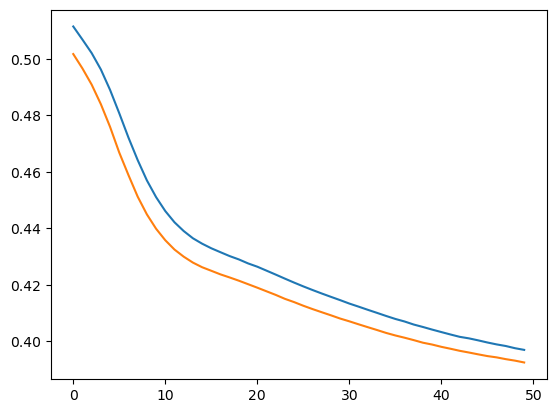

In [227]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()                                  # see how the loss is reducing for training and validation set.